##About Dataset

**Dataset:** 

* AirBnb - Singapore market
* Data source: Inside Airbnb website http://insideairbnb.com/get-the-data.html which hosts publicly available data from the Airbnb site.
* Scrape date: Sep 21,2021 
* Number of Recording: 4221 entries








###Import Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
listing = pd.read_csv('https://raw.githubusercontent.com/Huyenptt113/datafile/master/listings2.csv')

In [ ]:
listing.head(3)

id  ... reviews_per_month
0  50646  ...              0.21
1  71609  ...              0.27
2  71896  ...              0.32

[3 rows x 74 columns]

In [ ]:
listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [ ]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4221 entries, 0 to 4220
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4221 non-null   int64  
 1   listing_url                                   4221 non-null   object 
 2   scrape_id                                     4221 non-null   int64  
 3   last_scraped                                  4221 non-null   object 
 4   name                                          4221 non-null   object 
 5   description                                   4084 non-null   object 
 6   neighborhood_overview                         2766 non-null   object 
 7   picture_url                                   4221 non-null   object 
 8   host_id                                       4221 non-null   int64  
 9   host_url                                      4221 non-null   o

In [ ]:
listing.describe()

id  ...  reviews_per_month
count  4.221000e+03  ...        2410.000000
mean   3.058462e+07  ...           0.647780
std    1.422863e+07  ...           1.459616
min    5.064600e+04  ...           0.010000
25%    1.953525e+07  ...           0.070000
50%    3.282593e+07  ...           0.200000
75%    4.282991e+07  ...           0.750000
max    5.250524e+07  ...          36.320000

[8 rows x 39 columns]

In [ ]:
listing.shape

(4221, 74)

In [ ]:
listing.head(2)

id  ... reviews_per_month
0  50646  ...              0.21
1  71609  ...              0.27

[2 rows x 74 columns]

## Audience

* Our target audience we toward to are: Hosts having listing in central area

## Question

How a host in Central Region Singapore
could increase the number of booking on
Airbnb?
(In terms of location, room type, price,
host impression, number of listing)

# A - Data Cleaning

## A1 - Remove unwanted observations

###UNNECCESSARY COLUMNS (with explanation)

**#UNNECCESSARY COLUMNS (with explanation)**

0   id: OK, listing identifier that can be used to create a join with other files 

 1   listing_url: DROP, interesting if we want to analyse the pictures as well but out of scope otherwise 

 2   scrape_id: DROP, same for all the records  

 3   last_scraped: DROP

 4   name: Consider 

 5   description: DROP, as above

 6   neighborhood_overview: DROP, equires lot of preprocessing to turn into useful a feature

 7   picture_url: DROP, interesting if we want to analyse the pictures as well but out of scope otherwise 

 8   host_id: OK

 9   host_url: DROP, host profile is out of scope 

 10  host_name: DROP, use host_id 

 11  host_since: OK, can be used to calculate host experience based on duration since the first listing

 12  host_location: DROP
 
 13  host_about: DROP 

 14  host_response_time: Consider 

 15  host_response_rate: Consider

 16  host_acceptance_rate: Consider

 17  host_is_superhost: OK, categorical t or f - describing highly rated and relaible hosts

 18  host_thumbnail_url: DROP 

19  host_picture_url: DROP 

 20  host_neighbourhood: DROP

 21  host_listings_count: DROP, we will use more accurate calculated_host_listings_count

 22  host_total_listings_count: Consider

 23  host_verifications: DROP, list of host verification methods - information already contained in host_identity_verified

 24  host_has_profile_pic: OK, categorical t or f - profiles with pictures are seen as more credible

 25  host_identity_verified: OK, categorical t or f - another credibility metric

 26  neighbourhood: DROP, neighbourhood_cleansed will be used instead

 27  neighbourhood_cleansed: OK

 28  neighbourhood_group_cleansed: OK, categorical value which will be used to identify most popular parts of Singapore

 29  latitude: OK, we will use it later to visualise the data on the map

 30  longitude: OK, we will use it later to visualise the data on the map

 31  property_type: DROP

 32  room_type: OK, categorical variable

 33  accommodates: OK, discrete value describing property

 34  bathrooms: DROP, since 0 non-null

 35  bathrooms_text: OK, another discrete value describing property

 36  bedrooms: OK, another discrete value describing property

 37  beds: OK, another discrete value describing property

 38  amenities: OK, due to number of unique features (over 100) we will only concentrate on the total number of amenities

 39  price: OK, to calculate price per night for number of included guests

 40  minimum_nights: OK, another discrete value that is cost related.

 41  maximum_nights: OK, another discrete value that is cost related.

 42  minimum_minimum_nights: DROP

 43  maximum_minimum_nights: DROP

 44  minimum_maximum_nights: DROP

 45  maximum_maximum_nights: DROP

 46  minimum_nights_avg_ntm: DROP

 47  maximum_nights_avg_ntm: DROP

 48  calendar_updated: DROP, no need, we are not interested in future data that is a subject to daily updates

 49  has_availability: DROP, as above

 50  availability_30: DROP, as above

 51  availability_60: DROP, as above

 52  availability_90: DROP, as above

 53  availability_365: DROP, as above

 54  calendar_last_scraped: DROP, no need this information

 55  number_of_reviews: OK, total number of reviews in entire listing history

 56  number_of_reviews_ltm: DROP, use number_of_reviews

 57  number_of_reviews_l30d: DROP, use number_of_reviews 

 58  first_review: DROP 

 59  last_review: DROP 

 60  review_scores_rating: DROP, this value is calculated based on other scores

 61  review_scores_accuracy: OK

 62  review_scores_cleanliness: OK

 63  review_scores_checkin:OK

 64  review_scores_communication: OK

 65  review_scores_location: OK

 66  review_scores_value: OK

 67  license: DROP, textual value that is mostly nul 

 68  instant_bookable: OK, categorical value - t or false

 69  calculated_host_listings_count: OK, continious value which is actual number of host listings - another metric to measure host experience or to distinguish buisness from individual

 70  calculated_host_listings_count_entire_homes: OK

 71  calculated_host_listings_count_private_rooms: OK

 72  calculated_host_listings_count_shared_rooms: OK  
 73  reviews_per_month: consider, just 50% non-null, we will re-calculate this field using our formula

### DROP COLUMNS

In [ ]:
#DROP UNECESSARY COLUMS
columns = ['listing_url','scrape_id','last_scraped','description','picture_url','host_url','host_name',
           'host_location','host_about','host_picture_url','host_thumbnail_url','host_verifications',
           'neighbourhood', 'neighborhood_overview', 'bathrooms','has_availability','availability_30','availability_60','availability_90','availability_365',
           'minimum_minimum_nights', 'maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm',
           'calendar_updated','calendar_last_scraped',
           'number_of_reviews_ltm','number_of_reviews_l30d',
           'license','host_listings_count','host_neighbourhood','first_review','last_review']

listing_clean = listing.drop(columns= columns)

In [ ]:
listing.head(2)

id  ... reviews_per_month
0  50646  ...              0.21
1  71609  ...              0.27

[2 rows x 74 columns]

In [ ]:
listing_clean.sample()

id  ... reviews_per_month
3689  46686341  ...               NaN

[1 rows x 39 columns]

In [ ]:
# check infor after columns dropping
listing_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4221 entries, 0 to 4220
Data columns (total 39 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4221 non-null   int64  
 1   name                                          4221 non-null   object 
 2   host_id                                       4221 non-null   int64  
 3   host_since                                    4213 non-null   object 
 4   host_response_time                            3456 non-null   object 
 5   host_response_rate                            3456 non-null   object 
 6   host_acceptance_rate                          3169 non-null   object 
 7   host_is_superhost                             4213 non-null   object 
 8   host_total_listings_count                     4213 non-null   float64
 9   host_has_profile_pic                          4213 non-null   o

In [ ]:
#check duplication
listing_clean.duplicated().sum()

0

## A2 - Structural Error, Correct Datatype

In [ ]:
# Change Data-type 
listing_clean['host_since'] = pd.to_datetime(listing_clean['host_since'])
listing_clean['host_response_rate'] = listing_clean['host_response_rate'].str.replace('%','').astype('float')
listing_clean['host_acceptance_rate'] = listing_clean['host_acceptance_rate'].str.replace('%','').astype('float')

In [ ]:
# Change Data-type 
listing_clean['price'] = listing_clean['price'].str.replace(r'[$,]', '').astype('float')

In [ ]:
#re-check data type after changing type

listing_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4221 entries, 0 to 4220
Data columns (total 39 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            4221 non-null   int64         
 1   name                                          4221 non-null   object        
 2   host_id                                       4221 non-null   int64         
 3   host_since                                    4213 non-null   datetime64[ns]
 4   host_response_time                            3456 non-null   object        
 5   host_response_rate                            3456 non-null   float64       
 6   host_acceptance_rate                          3169 non-null   float64       
 7   host_is_superhost                             4213 non-null   object        
 8   host_total_listings_count                     4213 non-null   float6

## A3 - Handling Missing Values

### Drop

In [ ]:
# Filter out the remaining rows with Null data (only 0.27% of total dataframe)
listing_clean = listing_clean[listing_clean['host_since'].notna()]
listing_clean = listing_clean[listing_clean['host_is_superhost'].notna()]
listing_clean = listing_clean[listing_clean['host_total_listings_count'].notna()]
listing_clean = listing_clean[listing_clean['host_has_profile_pic'].notna()]
listing_clean = listing_clean[listing_clean['host_identity_verified'].notna()]

In [ ]:
#check null value
listing_clean.isna().sum()

id                                                 0
name                                               0
host_id                                            0
host_since                                         0
host_response_time                               757
host_response_rate                               757
host_acceptance_rate                            1044
host_is_superhost                                  0
host_total_listings_count                          0
host_has_profile_pic                               0
host_identity_verified                             0
neighbourhood_cleansed                             0
neighbourhood_group_cleansed                       0
latitude                                           0
longitude                                          0
property_type                                      0
room_type                                          0
accommodates                                       0
bathrooms_text                                

### Filling missing data in selected columns

####1-Filling REVIEW SCORES (6 columns) 





Note:  Decide filling mising value with **0** of columns below:
1. review_scores_accuracy
2. review_scores_cleanliness
3. review_scores_checkin
4. review_scores_communication
5. review_scores_location
6. review_scores_value
7. review_scores_rating

In [ ]:
# fill all the NaN values ['review_scores_rating']
listing_clean['review_scores_rating'] = listing_clean[['review_scores_rating']].fillna(0)

# fill all the NaN values in ['review_scores_accuracy'] with mean()
listing_clean['review_scores_accuracy'] = listing_clean[['review_scores_accuracy']].fillna(0)

# fill all the NaN values ['review_scores_cleanliness']
listing_clean['review_scores_cleanliness'] = listing_clean[['review_scores_cleanliness']].fillna(0)

# fill all the NaN values ['review_scores_checkin']
listing_clean['review_scores_checkin'] = listing_clean[['review_scores_checkin']].fillna(0)

# fill all the NaN values ['review_scores_communication']
listing_clean['review_scores_communication'] = listing_clean[['review_scores_communication']].fillna(0)

# fill all the NaN values ['review_scores_location']
listing_clean['review_scores_location'] = listing_clean[['review_scores_location']].fillna(0)

# fill all the NaN values ['review_scores_value']
listing_clean['review_scores_value'] = listing_clean[['review_scores_value']].fillna(0)

In [ ]:
# re-check after DROP and CREATE column of review_score_rating
listing_clean.sample()

id  ... reviews_per_month
4068  51052174  ...               NaN

[1 rows x 39 columns]

Re-check the columns of review-score after handling - 

####3-Filling data: review_per_month

Decide filling with **(-1)** of number of reviews per month

In [ ]:
# filling data
listing_clean['reviews_per_month'] = listing_clean[['reviews_per_month']].fillna(-1)

In [ ]:
# re-check
listing_clean.isna().sum()

id                                                 0
name                                               0
host_id                                            0
host_since                                         0
host_response_time                               757
host_response_rate                               757
host_acceptance_rate                            1044
host_is_superhost                                  0
host_total_listings_count                          0
host_has_profile_pic                               0
host_identity_verified                             0
neighbourhood_cleansed                             0
neighbourhood_group_cleansed                       0
latitude                                           0
longitude                                          0
property_type                                      0
room_type                                          0
accommodates                                       0
bathrooms_text                                

####4- Filling data: host_response_rate: 






In [ ]:
  #if superhost is true:
if_t = (listing_clean['host_is_superhost'] == 't')

superhost_t = listing_clean[if_t & (listing_clean['host_response_rate'].notna())]
superhost_t_mean = superhost_t['host_response_rate'].mean()

listing_clean.loc[if_t,'host_response_rate'] = listing_clean.loc[if_t,'host_response_rate'].fillna(superhost_t_mean)

  #if superhost is false:
if_f = (listing_clean['host_is_superhost'] == 'f')

superhost_f = listing_clean[if_f & (listing_clean['host_response_time'].notna())]
superhost_f_mean = superhost_f['host_response_rate'].mean()

listing_clean.loc[if_f,'host_response_rate'] = listing_clean.loc[if_f,'host_response_rate'].fillna(superhost_f_mean)

####5 -Filling Data: host_response_time

In [ ]:
### Host_response_time:
  #if superhost is true:
listing_clean.loc[if_t,'host_response_time'] = listing_clean.loc[if_t,'host_response_time'].fillna('within an hour')

  #if superhost is false:
listing_clean.loc[if_f,'host_response_time'] = listing_clean.loc[if_f,'host_response_time'].fillna('within a day')

####6-Filling data: host_acceptance_rate 

In [ ]:

  # with reviews:
with_review = (listing_clean['reviews_per_month'].notna())
review_mean = listing_clean[with_review]['host_acceptance_rate'].mean()
listing_clean.loc[with_review,'host_acceptance_rate'] = listing_clean.loc[with_review,'host_acceptance_rate'].fillna(review_mean)

  # no reviews
no_review = (listing_clean['reviews_per_month'].isna())
no_review_mean = listing_clean[no_review]['host_acceptance_rate'].mean()
listing_clean.loc[no_review,'host_acceptance_rate'] = listing_clean.loc[no_review,'host_acceptance_rate'].fillna(no_review_mean)

In [ ]:
# Check again:
listing_clean.isna().sum()

id                                                0
name                                              0
host_id                                           0
host_since                                        0
host_response_time                                0
host_response_rate                                0
host_acceptance_rate                              0
host_is_superhost                                 0
host_total_listings_count                         0
host_has_profile_pic                              0
host_identity_verified                            0
neighbourhood_cleansed                            0
neighbourhood_group_cleansed                      0
latitude                                          0
longitude                                         0
property_type                                     0
room_type                                         0
accommodates                                      0
bathrooms_text                                   29
bedrooms    

####7-Filling data: Property

In [ ]:
def check_room_type(x):
  if x['room_type'] == 'Entire home/apt':
      return  2.0
  elif x['room_type'] == 'Shared room':
      return  1.0
  else:
      return  1.0
# fill the missing value with the apply function:
listing_clean['bedrooms']= listing_clean['bedrooms'].fillna(listing_clean.apply(check_room_type,axis=1))   

#similarly, we do the same with beds column:
listing_clean['beds']= listing_clean['beds'].fillna(listing_clean.apply(check_room_type,axis=1))   
# change beds and bedrooms to int 
listing_clean['bedrooms']= listing_clean['bedrooms'].astype('int')
listing_clean['beds']= listing_clean['beds'].astype('int')

In [ ]:
# fill missing value of bathrooms_text with 1
listing_clean['bathrooms_text'] = listing_clean['bathrooms_text'].fillna('1')
# step 2: takes the "number " out the the strings of the column
listing_clean['bathrooms_text'] = listing_clean['bathrooms_text'].str.replace(r'[a-zA-Z\s]', '')
# replace the '' values to 1:
listing_clean['bathrooms_text'] = listing_clean['bathrooms_text'].str.replace(r'\D$','1')
# turn the type to float
listing_clean['bathrooms_text'] = listing_clean['bathrooms_text'].astype('float')
# change the name to barthrooms
listing_clean.rename(columns = {'bathrooms_text':'bathrooms'}, inplace = True)

In [ ]:
# check the columns again:
listing_clean.isna().sum()

id                                              0
name                                            0
host_id                                         0
host_since                                      0
host_response_time                              0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_total_listings_count                       0
host_has_profile_pic                            0
host_identity_verified                          0
neighbourhood_cleansed                          0
neighbourhood_group_cleansed                    0
latitude                                        0
longitude                                       0
property_type                                   0
room_type                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0


##A.4 - Handling errors, corrupted data

#### Check outlier

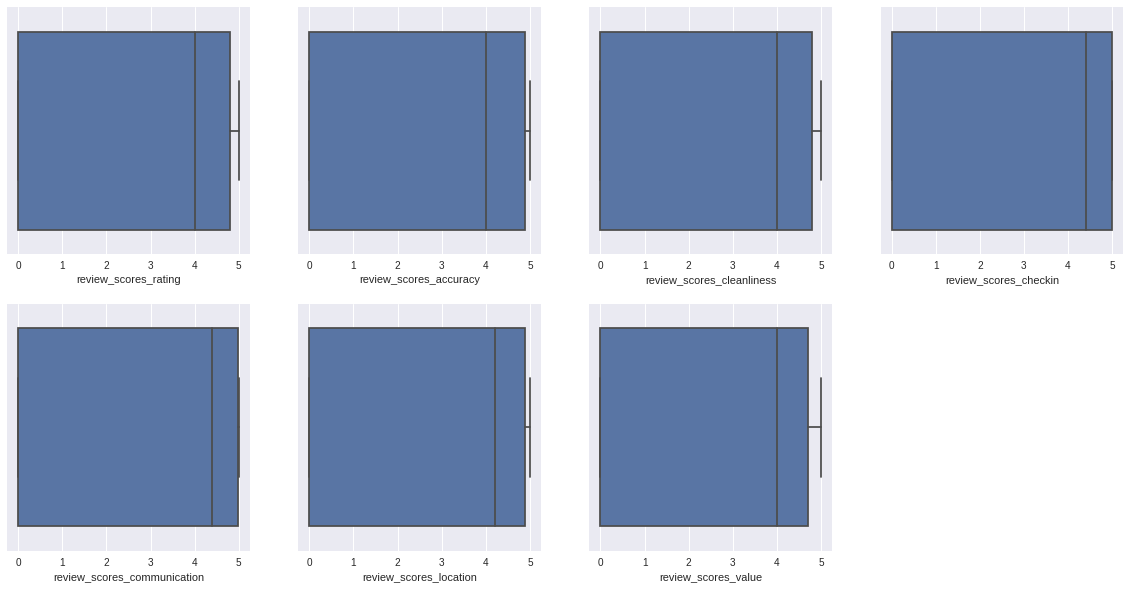

In [ ]:
# Outliers - listing.gz / review columns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

plt.figure(figsize=(20, 10))

plt.subplot(241)
rating = listing_clean['review_scores_rating'].reset_index()
sns.boxplot(data=rating, x = 'review_scores_rating')

plt.subplot(242)
accuracy = listing_clean['review_scores_accuracy'].reset_index()
sns.boxplot(data=accuracy, x = 'review_scores_accuracy')

plt.subplot(243)
cleanliness = listing_clean['review_scores_cleanliness'].reset_index()
sns.boxplot(data=cleanliness, x = 'review_scores_cleanliness')

plt.subplot(244)
checkin = listing_clean['review_scores_checkin'].reset_index()
sns.boxplot(data=checkin, x = 'review_scores_checkin')

plt.subplot(245)
communication = listing_clean['review_scores_communication'].reset_index()
sns.boxplot(data=communication, x = 'review_scores_communication')

plt.subplot(246)
location = listing_clean['review_scores_location'].reset_index()
sns.boxplot(data=location, x = 'review_scores_location')

plt.subplot(247)
value = listing_clean['review_scores_value'].reset_index()
sns.boxplot(data=value, x = 'review_scores_value')

plt.show()

###Correcting data: number_of_beds -

Value=0 is found. It's incorrect since there is at least 1 bed in a listing
==> decide correct value=0 by function fix_beds at below

In [ ]:
# Check min / max / mean / median / mode of ['beds']
print(listing_clean['beds'].max())
print(listing_clean['beds'].min())
print(listing_clean['beds'].mean())
print(listing_clean['beds'].median())
print(listing_clean['beds'].mode())

58
0
1.8001424163304058
1.0
0    1
dtype: int64


In [ ]:
# check room_type to correct value of value=0 of ['beds']
listing_clean[listing_clean['beds'] == 0]['room_type'].value_counts()

Private room       130
Entire home/apt     79
Shared room          6
Hotel room           6
Name: room_type, dtype: int64

In [ ]:
# function to correct value=0 of ['beds']
def fix_beds(x):
  if x['room_type'] == 'Entire home/apt':
      return  2.0
  elif x['room_type'] == 'Shared room':
      return  1.0
  else:
      return  1.0

In [ ]:
# correct value=0 of ['beds']
listing_clean[listing_clean['beds'] == 0]['beds'] = listing_clean[listing_clean['beds'] == 0].apply(fix_beds, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Re-check min / max / mean / median / mode of ['beds']
print(listing_clean['beds'].max())
print(listing_clean['beds'].min())
print(listing_clean['beds'].mean())
print(listing_clean['beds'].median())
print(listing_clean['beds'].mode())

58
0
1.8001424163304058
1.0
0    1
dtype: int64


#B - Exploratory Data Analysis

##**Select - top5_neighbor**

In [ ]:
#overview listing in Central Area
central = listing_clean[listing_clean['neighbourhood_group_cleansed']=='Central Region']
central.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3379 entries, 0 to 4220
Data columns (total 39 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            3379 non-null   int64         
 1   name                                          3379 non-null   object        
 2   host_id                                       3379 non-null   int64         
 3   host_since                                    3379 non-null   datetime64[ns]
 4   host_response_time                            3379 non-null   object        
 5   host_response_rate                            3379 non-null   float64       
 6   host_acceptance_rate                          3379 non-null   float64       
 7   host_is_superhost                             3379 non-null   object        
 8   host_total_listings_count                     3379 non-null   float6

In [ ]:
central1000 = central.sort_values('reviews_per_month',ascending=False).head(1000)
central1000

id  ... reviews_per_month
2509  37853876  ...             36.32
3310  43407835  ...             25.71
2039  32113481  ...             23.00
3290  43337094  ...             15.86
4071  51076382  ...             11.00
...        ...  ...               ...
2961  41142197  ...              0.20
2077  32502391  ...              0.20
3024  41613235  ...              0.20
263    6638508  ...              0.20
749   15274648  ...              0.20

[1000 rows x 39 columns]

In [ ]:
central1000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 2509 to 749
Data columns (total 39 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            1000 non-null   int64         
 1   name                                          1000 non-null   object        
 2   host_id                                       1000 non-null   int64         
 3   host_since                                    1000 non-null   datetime64[ns]
 4   host_response_time                            1000 non-null   object        
 5   host_response_rate                            1000 non-null   float64       
 6   host_acceptance_rate                          1000 non-null   float64       
 7   host_is_superhost                             1000 non-null   object        
 8   host_total_listings_count                     1000 non-null   floa

In [ ]:
review_per_month_central1000 = central1000.groupby('neighbourhood_cleansed')['reviews_per_month'].agg(['mean','min','max','sum']).reset_index()
review_per_month_central1000.sort_values('mean',ascending = False)

neighbourhood_cleansed      mean   min    max     sum
17       Southern Islands  3.610000  0.31   6.91    7.22
6            Marina South  2.670000  2.67   2.67    2.67
19              Toa Payoh  2.242500  0.24   5.56   17.94
1             Bukit Merah  2.012787  0.21  36.32  122.78
3           Downtown Core  1.772895  0.20  15.86  134.74
15                 Rochor  1.710091  0.21  25.71  188.11
7           Marine Parade  1.602500  0.20   4.39   32.05
5                 Kallang  1.211014  0.20  23.00  167.12
14           River Valley  1.147627  0.21   6.98   67.71
4                 Geylang  1.073149  0.20   5.85  194.24
12                 Outram  1.021769  0.21  10.41  150.20
9                  Newton  0.990000  0.24   2.85   13.86
13             Queenstown  0.946216  0.21   8.60   35.01
16        Singapore River  0.883684  0.21   2.92   16.79
18                Tanglin  0.849259  0.22   5.30   22.93
2             Bukit Timah  0.837000  0.21   1.98    8.37
10                 Novena  0.740678  0.21   3.48   43.70
8                  Museum  0.658000  0.22   1.08    3.29
11                Orchard  0.640500  0.20   2.09   12.81
0                  Bishan  0.625000  0.25   1.01    3.75

In [ ]:
neighbor_5 = review_per_month_central1000.sort_values('max',ascending = False)
neighbor_5.head(5)

neighbourhood_cleansed      mean   min    max     sum
1             Bukit Merah  2.012787  0.21  36.32  122.78
15                 Rochor  1.710091  0.21  25.71  188.11
5                 Kallang  1.211014  0.20  23.00  167.12
3           Downtown Core  1.772895  0.20  15.86  134.74
12                 Outram  1.021769  0.21  10.41  150.20

In [ ]:
top5_neighbor = central1000[central1000['neighbourhood_cleansed'].isin(['Bukit Merah','Rochor','Downtown Core','Kallang','Outram'])]
top5_neighbor

id  ... reviews_per_month
2509  37853876  ...             36.32
3310  43407835  ...             25.71
2039  32113481  ...             23.00
3290  43337094  ...             15.86
4071  51076382  ...             11.00
...        ...  ...               ...
109    3717196  ...              0.21
389    8625349  ...              0.21
1009  18906439  ...              0.21
2077  32502391  ...              0.20
263    6638508  ...              0.20

[532 rows x 39 columns]

In [ ]:
top5_neighbor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 2509 to 263
Data columns (total 39 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            532 non-null    int64         
 1   name                                          532 non-null    object        
 2   host_id                                       532 non-null    int64         
 3   host_since                                    532 non-null    datetime64[ns]
 4   host_response_time                            532 non-null    object        
 5   host_response_rate                            532 non-null    float64       
 6   host_acceptance_rate                          532 non-null    float64       
 7   host_is_superhost                             532 non-null    object        
 8   host_total_listings_count                     532 non-null    float

## 

In [ ]:
top5_neighbor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 2509 to 263
Data columns (total 39 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            532 non-null    int64         
 1   name                                          532 non-null    object        
 2   host_id                                       532 non-null    int64         
 3   host_since                                    532 non-null    datetime64[ns]
 4   host_response_time                            532 non-null    object        
 5   host_response_rate                            532 non-null    float64       
 6   host_acceptance_rate                          532 non-null    float64       
 7   host_is_superhost                             532 non-null    object        
 8   host_total_listings_count                     532 non-null    float

In [ ]:
top5_neighbor.sample()

id  ... reviews_per_month
3724  47211647  ...               0.6

[1 rows x 39 columns]

**Number of review of each Neighborhood**

In [ ]:
# number of review theo neighborhood

num_review_neighborhood = top5_neighbor.groupby(['neighbourhood_cleansed'])['number_of_reviews'].agg(['sum','mean','max','min']).reset_index()
num_review_neighborhood.sort_values('sum',ascending=False)

neighbourhood_cleansed   sum       mean  max  min
4                 Rochor  5900  53.636364  295    1
2                Kallang  5611  40.659420  246    1
3                 Outram  5175  35.204082  206    1
1          Downtown Core  2712  35.684211  257    1
0            Bukit Merah  2025  33.196721  322    1

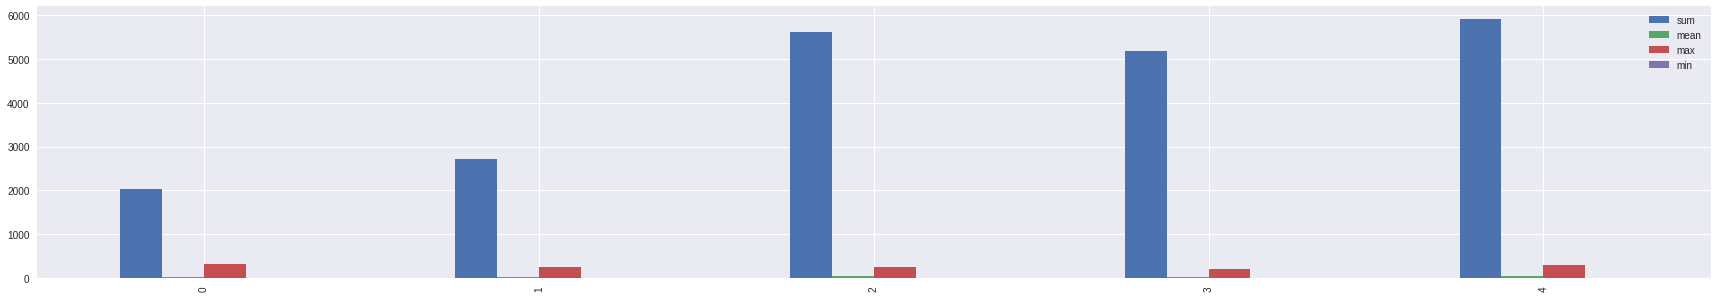

In [ ]:
num_review_neighborhood.plot(kind = 'bar',figsize = (30,5))

Theo Room_type : Entire Home - Just Draft

In [ ]:
# AVG number of review theo neighborhood

num_review_neighborhood_entirehome = top5_neighbor[top5_neighbor['room_type'] == 'Entire home/apt'].groupby(['neighbourhood_cleansed','room_type'])['number_of_reviews'].agg(['mean','max']).reset_index()
num_review_neighborhood_entirehome

neighbourhood_cleansed        room_type       mean  max
0            Bukit Merah  Entire home/apt  24.952381  181
1          Downtown Core  Entire home/apt  26.093750  138
2                Kallang  Entire home/apt  42.230769  246
3                 Outram  Entire home/apt  29.369231  131
4                 Rochor  Entire home/apt  60.595238  295

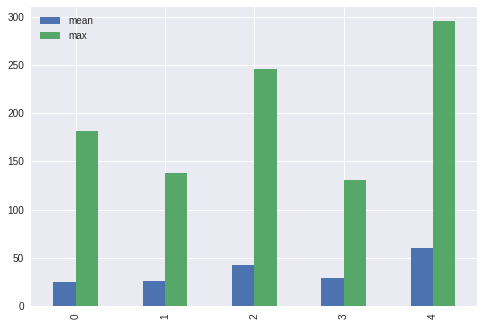

In [ ]:
num_review_neighborhood_entirehome.plot(kind = 'bar')

In [ ]:
j_top5_neighbor = top5_neighbor.copy()
j_top5_neighbor.sample()

id  ... reviews_per_month
990  18509748  ...              1.38

[1 rows x 39 columns]

In [ ]:
j_top5_neighbor['price_per_person'] = j_top5_neighbor['price'] / j_top5_neighbor['accommodates']
j_top5_neighbor.sample()

id  ... price_per_person
106  3639516  ...           1.5625

[1 rows x 40 columns]

In [ ]:
# full

jenny_neighborhood = top5_neighbor.groupby(['neighbourhood_cleansed','room_type'])['id','price','number_of_reviews','minimum_nights'].agg({'id':'count','price':['mean','max'],'number_of_reviews':['mean','max'],'minimum_nights':['mean','max','min']}).reset_index()
jenny_neighborhood

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


neighbourhood_cleansed        room_type    id  ... minimum_nights          
                                           count  ...           mean   max min
0             Bukit Merah  Entire home/apt    42  ...       7.333333    90   1
1             Bukit Merah       Hotel room     1  ...       1.000000     1   1
2             Bukit Merah     Private room    18  ...      39.777778   180   1
3           Downtown Core  Entire home/apt    32  ...      35.562500   120   1
4           Downtown Core       Hotel room    11  ...      67.272727   365   1
5           Downtown Core     Private room    31  ...       2.322581    32   1
6           Downtown Core      Shared room     2  ...       1.000000     1   1
7                 Kallang  Entire home/apt    52  ...      11.403846    90   1
8                 Kallang       Hotel room    20  ...       1.000000     1   1
9                 Kallang     Private room    49  ...      45.877551  1000   1
10                Kallang      Shared room    17  ...       1.000000     1   1
11                 Outram  Entire home/apt    65  ...      23.015385    90   2
12                 Outram       Hotel room    47  ...       4.255319    30   1
13                 Outram     Private room    32  ...      19.781250    90   1
14                 Outram      Shared room     3  ...       1.000000     1   1
15                 Rochor  Entire home/apt    42  ...      15.190476   180   1
16                 Rochor       Hotel room     5  ...       1.000000     1   1
17                 Rochor     Private room    38  ...      12.263158    90   1
18                 Rochor      Shared room    25  ...       1.840000     5   1

[19 rows x 10 columns]

**Price**

In [ ]:
#price only

price_neighborhood = top5_neighbor.groupby(['neighbourhood_cleansed','room_type'])['price'].agg({'mean','max','min'}).reset_index()
price_neighborhood

neighbourhood_cleansed        room_type   min     max        mean
0             Bukit Merah  Entire home/apt  85.0  2500.0  199.500000
1             Bukit Merah       Hotel room  33.0    33.0   33.000000
2             Bukit Merah     Private room  38.0   581.0  109.888889
3           Downtown Core  Entire home/apt  85.0   573.0  202.062500
4           Downtown Core       Hotel room  28.0   525.0  226.363636
5           Downtown Core     Private room  48.0   300.0  103.548387
6           Downtown Core      Shared room  51.0    79.0   65.000000
7                 Kallang  Entire home/apt  68.0  2500.0  235.173077
8                 Kallang       Hotel room  22.0   225.0   49.150000
9                 Kallang     Private room  28.0   287.0   78.795918
10                Kallang      Shared room  24.0    59.0   33.058824
11                 Outram  Entire home/apt  75.0   706.0  140.076923
12                 Outram       Hotel room  25.0   367.0  118.063830
13                 Outram     Private room  42.0   399.0  129.375000
14                 Outram      Shared room  33.0    63.0   48.666667
15                 Rochor  Entire home/apt  75.0   441.0  141.500000
16                 Rochor       Hotel room  29.0   118.0   66.400000
17                 Rochor     Private room  38.0   199.0   84.473684
18                 Rochor      Shared room  25.0   130.0   35.240000

**Number of Listing of each Neiborhood**

In [ ]:
num_listing_neighborhood = top5_neighbor.groupby(['neighbourhood_cleansed','room_type'])['id'].count().reset_index()
num_listing_neighborhood

neighbourhood_cleansed        room_type  id
0             Bukit Merah  Entire home/apt  42
1             Bukit Merah       Hotel room   1
2             Bukit Merah     Private room  18
3           Downtown Core  Entire home/apt  32
4           Downtown Core       Hotel room  11
5           Downtown Core     Private room  31
6           Downtown Core      Shared room   2
7                 Kallang  Entire home/apt  52
8                 Kallang       Hotel room  20
9                 Kallang     Private room  49
10                Kallang      Shared room  17
11                 Outram  Entire home/apt  65
12                 Outram       Hotel room  47
13                 Outram     Private room  32
14                 Outram      Shared room   3
15                 Rochor  Entire home/apt  42
16                 Rochor       Hotel room   5
17                 Rochor     Private room  38
18                 Rochor      Shared room  25

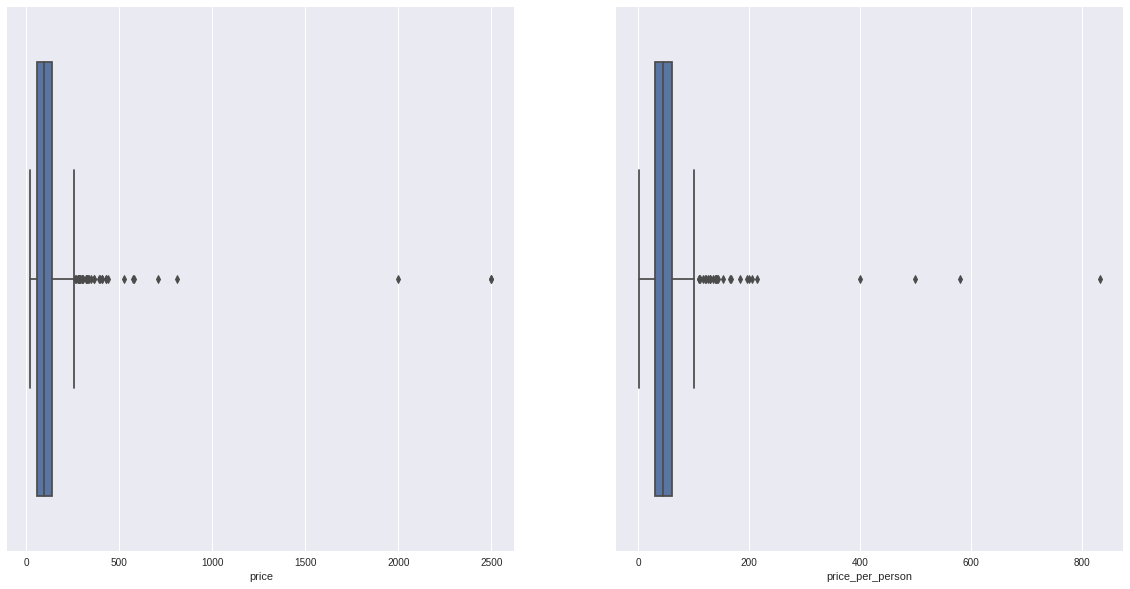

In [ ]:
# Outliers - Price / Price per person
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

plt.figure(figsize=(20, 10))

plt.subplot(121)
check_price = top5_neighbor['price'].reset_index()
sns.boxplot(data=check_price, x = 'price')

plt.subplot(122)
check_price_per_person = j_top5_neighbor['price_per_person'].reset_index()
sns.boxplot(data=check_price_per_person, x = 'price_per_person')

plt.show()

In [ ]:
review_per_month_1000 = top5_neighbor.groupby('neighbourhood_cleansed')['reviews_per_month'].agg(['mean','min','max','sum']).reset_index()
review_per_month_1000.sort_values('mean',ascending = False)

neighbourhood_cleansed      mean   min    max     sum
0            Bukit Merah  2.012787  0.21  36.32  122.78
1          Downtown Core  1.772895  0.20  15.86  134.74
4                 Rochor  1.710091  0.21  25.71  188.11
2                Kallang  1.211014  0.20  23.00  167.12
3                 Outram  1.021769  0.21  10.41  150.20

In [ ]:
central5 = top5_neighbor.groupby('neighbourhood_cleansed')['reviews_per_month'].mean().reset_index()

In [ ]:
total_list_central = top5_neighbor.groupby('neighbourhood_cleansed')[['host_total_listings_count','number_of_reviews']].agg({'host_total_listings_count':['sum','mean'],'number_of_reviews':['sum','mean']}).reset_index()
total_list_central

neighbourhood_cleansed host_total_listings_count  ... number_of_reviews           
                                               sum  ...               sum       mean
0            Bukit Merah                    1783.0  ...              2025  33.196721
1          Downtown Core                    3494.0  ...              2712  35.684211
2                Kallang                    2824.0  ...              5611  40.659420
3                 Outram                    3464.0  ...              5175  35.204082
4                 Rochor                    1423.0  ...              5900  53.636364

[5 rows x 5 columns]

In [ ]:
list_central = top5_neighbor.groupby('neighbourhood_cleansed')['host_total_listings_count'].agg(['sum','mean']).reset_index()
list_central=list_central.sort_values('sum',ascending=False)
list_central

neighbourhood_cleansed     sum       mean
1          Downtown Core  3494.0  45.973684
3                 Outram  3464.0  23.564626
2                Kallang  2824.0  20.463768
0            Bukit Merah  1783.0  29.229508
4                 Rochor  1423.0  12.936364

In [ ]:
total_review_central1 = top5_neighbor.groupby('neighbourhood_cleansed')['number_of_reviews'].agg(['sum','mean']).reset_index()
total_review_central1 = total_review_central1.sort_values('sum',ascending=False)
total_review_central1

neighbourhood_cleansed   sum       mean
4                 Rochor  5900  53.636364
2                Kallang  5611  40.659420
3                 Outram  5175  35.204082
1          Downtown Core  2712  35.684211
0            Bukit Merah  2025  33.196721

In [ ]:
total_superhost =  top5_neighbor.groupby(['neighbourhood_cleansed','host_is_superhost'])['id'].count().reset_index()
total_superhost

neighbourhood_cleansed host_is_superhost  id
0            Bukit Merah                 f  50
1            Bukit Merah                 t  11
2          Downtown Core                 f  52
3          Downtown Core                 t  24
4                Kallang                 f  90
5                Kallang                 t  48
6                 Outram                 f  96
7                 Outram                 t  51
8                 Rochor                 f  68
9                 Rochor                 t  42

In [ ]:
top5_neighbor.groupby(['neighbourhood_cleansed','host_is_superhost','host_response_time'])['id'].count()
plot_response = top5_neighbor.groupby(['neighbourhood_cleansed','host_is_superhost'])['host_response_rate'].mean().reset_index()


In [ ]:
plot_acc = top5_neighbor.groupby(['neighbourhood_cleansed','host_is_superhost'])['host_acceptance_rate'].mean().reset_index()

In [ ]:
lst = []
def amenities(row):
  a = row.strip('[]').replace('"','').split(', ')
  return lst.extend(a)

top5_neighbor['amenities'].apply(amenities)
df = pd.DataFrame(lst, columns = ['Amenities'])

basics = ['Wifi','Air conditioning','Elevator','Kitchen','Hot water','Shampoo','Refrigerator']
amen = df[df['Amenities'].isin(basics)].value_counts().reset_index()

In [ ]:
top5_neighbor.groupby(['neighbourhood_cleansed','host_is_superhost','host_has_profile_pic'])['id'].count().reset_index()

neighbourhood_cleansed host_is_superhost host_has_profile_pic  id
0            Bukit Merah                 f                    t  50
1            Bukit Merah                 t                    t  11
2          Downtown Core                 f                    t  52
3          Downtown Core                 t                    t  24
4                Kallang                 f                    t  90
5                Kallang                 t                    t  48
6                 Outram                 f                    t  96
7                 Outram                 t                    t  51
8                 Rochor                 f                    t  68
9                 Rochor                 t                    t  42

# MOUNT  to Google Sheet

In [ ]:
# Connect to Google Sheets
!pip install --upgrade oauth2client gspread

In [ ]:
# Mount to Google Sheets 
from google.colab import auth
auth.authenticate_user()

# Import neccessary libraries
import gspread
from oauth2client.client import GoogleCredentials
from gspread_dataframe import set_with_dataframe

Create new spreadsheet, this step is only ran in the first time exporting data to gsheet.  

In [ ]:
# Authorize Google Sheets API
gc = gspread.authorize(GoogleCredentials.get_application_default())

# Create a new Google Spreadsheets
sh = gc.create('AirBnB_Group1') #đặt tên cho bảng ở đây

In [ ]:
# ❗️ Note that before export data, you have to create the empty sheets in the Google Sheet first
def export_data(gsheet_key, worksheet_id, data):
    """gsheet_key (str): ID of Google Sheet File. (Key is the part behind /d/ and before /edit
                   For example: https://docs.google.com/spreadsheets/d/1WISuNUrWc-7BPO2s-pD3P3qqqgiLh0wRpvTNNtN21gA/edit?usp=sharing
                   Key is 1WISuNUrWc-7BPO2s-pD3P3qqqgiLh0wRpvTNNtN21gA
       worksheet_id (int): 0, 1, 2, ... 
       data (DataFrame): data to write
    """
    
    sh = gc.open_by_key(gsheet_key)

    #
    worksheet = sh.get_worksheet(worksheet_id)

    #writr to worksheet
    
    set_with_dataframe(worksheet, data)

## **EXPORT TO GOOGLE SHEET**

---



In [ ]:

export_data('1RNyhStkcqqHjcIWDkiH84gn9bvHnviEXqeZEwHL7Up4', 0, listing_clean)
export_data('1RNyhStkcqqHjcIWDkiH84gn9bvHnviEXqeZEwHL7Up4', 1, central)
export_data('1RNyhStkcqqHjcIWDkiH84gn9bvHnviEXqeZEwHL7Up4', 2, central1000)
export_data('1RNyhStkcqqHjcIWDkiH84gn9bvHnviEXqeZEwHL7Up4', 3, review_per_month_central1000)
export_data('1RNyhStkcqqHjcIWDkiH84gn9bvHnviEXqeZEwHL7Up4', 4, top5_neighbor)

In [ ]:

export_data('1RNyhStkcqqHjcIWDkiH84gn9bvHnviEXqeZEwHL7Up4', 5, review_per_month_1000)
export_data('1RNyhStkcqqHjcIWDkiH84gn9bvHnviEXqeZEwHL7Up4', 6, central5)
export_data('1RNyhStkcqqHjcIWDkiH84gn9bvHnviEXqeZEwHL7Up4', 7, total_list_central)
export_data('1RNyhStkcqqHjcIWDkiH84gn9bvHnviEXqeZEwHL7Up4', 8, list_central)
export_data('1RNyhStkcqqHjcIWDkiH84gn9bvHnviEXqeZEwHL7Up4', 9, total_review_central1)
export_data('1RNyhStkcqqHjcIWDkiH84gn9bvHnviEXqeZEwHL7Up4', 10, total_superhost)
export_data('1RNyhStkcqqHjcIWDkiH84gn9bvHnviEXqeZEwHL7Up4', 11, plot_response)
export_data('1RNyhStkcqqHjcIWDkiH84gn9bvHnviEXqeZEwHL7Up4', 12, plot_acc)


In [ ]:

export_data('1RNyhStkcqqHjcIWDkiH84gn9bvHnviEXqeZEwHL7Up4', 13, price_neighborhood)
export_data('1RNyhStkcqqHjcIWDkiH84gn9bvHnviEXqeZEwHL7Up4', 14, num_listing_neighborhood)
export_data('1RNyhStkcqqHjcIWDkiH84gn9bvHnviEXqeZEwHL7Up4', 15, j_top5_neighbor)

In [ ]:
export_data('1RNyhStkcqqHjcIWDkiH84gn9bvHnviEXqeZEwHL7Up4', 16, amen)
